In [1]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

def visualize_program(program):
    # Create an empty Graph
    G = nx.Graph()
    
    G.add_node(10, label='IN')
    G.add_node(0, label='C0')
    G.add_node(1, label='C1')
    G.add_node(2, label='C2')
    G.add_node(3, label='C3')
    G.add_node(4, label='C4')
    G.add_node(5, label=program[0][-1][0])
    G.add_node(6, label=program[0][-1][1])
    G.add_node(7, label=program[0][1])
    G.add_node(8, label=program[1][-1])
    G.add_node(9, label=program[2][-1])
    G.add_node(11, label='OUT')
    
    # Add edges
    G.add_edge(program[0][2][0], 5)
    G.add_edge(program[0][2][1], 5)
    G.add_edge(program[0][2][1], 6)
    G.add_edge(program[0][2][2], 6)

    G.add_edge(program[0][0][0], 7)
    G.add_edge(program[0][0][1], 7)

    G.add_edge(program[1][0][0], 8)
    G.add_edge(program[1][0][1], 8)

    G.add_edge(8, 9)
    G.add_edge(program[-1][0], 9)
    G.add_edge(9, 11)
    
    G.add_edge(10, 0)
    G.add_edge(10, 1)
    G.add_edge(10, 2)
    G.add_edge(10, 3)
    G.add_edge(10, 4)

    pos = {
        0: (0, 0), 1: (3, 0), 2: (6, 0), 3: (9, 0), 4: (12, 0),
        5: (1.5, 1), 6: (4.5, 1), 7: (10.5, 1),
        8: (6, 2),
        9: (6, 3),
        10: (6, -1), 11: (6, 4)
    }
    
    fig = plt.figure(1, figsize=(5, 5), dpi=100)
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=800, alpha=0.2)

    # edges
    nx.draw_networkx_edges(
        G, pos, width=2.0, alpha=0.5, edge_color='b', arrows=True,
        arrowstyle='->', arrowsize=20,
        edge_cmap=plt.cm.Blues, min_source_margin=0, min_target_margin=0
    )

    # labels
    labels = {node: data['label'] for node, data in G.nodes(data=True)}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=12)

    # Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    ax.margins(0.1)
    plt.axis("off")
    plt.show()
    
def generate_programs():
    possible_programs = []
    for i in range(5):
        for j in range(5):
            if i != j:
                remaining_elements = {0,1,2,3,4} - {i,j}
                remaining_elements = \
                    list(itertools.permutations(
                    list(remaining_elements)))
                for k in remaining_elements:
                    for sign in [("==", "=="), ("==", "!="), ("!=", "=="), ("!=", "!=")]:
                        for lv2_combine in [(5, 6), (5, 7), (6, 7)]:
                            for lv2_sign in ["OR", "AND"]:
                                for lv3_sign in ["OR", "AND"]:
                                    lv3_element = list({5,6,7} - set(lv2_combine))[0]
                                    for entail_sign in ["Syn", "Ant"]:
                                        possible_programs += [
                                            (((i, j), entail_sign, tuple(k), sign), (lv2_combine, lv2_sign), (lv3_element, lv3_sign))
                                        ]
    return possible_programs

In [2]:
programs = generate_programs()

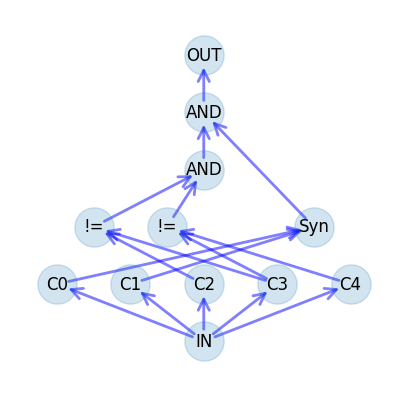

In [3]:
visualize_program(programs[78])

In [4]:
programs[169]

(((0, 1), 'Ant', (2, 4, 3), ('!=', '!=')), ((5, 6), 'OR'), (7, 'OR'))

In [5]:
with open('./synonyms.txt', 'r') as file:
    synonyms_lines = file.readlines()
with open('./antonyms.txt', 'r') as file:
    antonyms_lines = file.readlines()

synonyms_pairs = set([tuple(sorted(l.strip().lower().split(" - "))) for l in synonyms_lines])
antonyms_pairs = set([tuple(sorted(l.strip().lower().split(" - "))) for l in antonyms_lines])


def sample_factual_inputs(program):
    
    pass

In [6]:
programs[143]

(((0, 1), (3, 2, 4), ('!=', '!=')), ((6, 7), 'AND'), (5, 'AND'))

In [8]:
sample_factual_inputs(programs[143])

In [6]:
len(set([tuple(sorted(l.strip().lower().split(" - "))) for l in synonyms_lines]))

575

In [7]:
len(set([tuple(sorted(l.strip().lower().split(" - "))) for l in antonyms_lines]))

580

In [8]:
synonyms_lines

['Begin - Start\n',
 'Big - Large\n',
 'Happy - Joyful\n',
 'Sad - Unhappy\n',
 'Smart - Intelligent\n',
 'Brave - Courageous\n',
 'Funny - Hilarious\n',
 'Angry - Furious\n',
 'Pretty - Beautiful\n',
 'Fast - Quick\n',
 'Small - Tiny\n',
 'Strong - Powerful\n',
 'Rich - Wealthy\n',
 'Tired - Exhausted\n',
 'Cold - Chilly\n',
 'Hot - Warm\n',
 'Empty - Vacant\n',
 'Quiet - Silent\n',
 'True - Genuine\n',
 'False - Untrue\n',
 'Old - Ancient\n',
 'New - Fresh\n',
 'Clean - Spotless\n',
 'Dirty - Filthy\n',
 'Love - Adore\n',
 'Hate - Detest\n',
 'Stop - Cease\n',
 'End - Finish\n',
 'Give - Provide\n',
 'Take - Receive\n',
 'Win - Succeed\n',
 'Lose - Fail\n',
 'Improve - Enhance\n',
 'Decrease - Reduce\n',
 'Happy - Content\n',
 'Sad - Melancholy\n',
 'Smart - Clever\n',
 'Brave - Valiant\n',
 'Funny - Amusing\n',
 'Angry - Irritated\n',
 'Big - Enormous\n',
 'Small - Minuscule\n',
 'Strong - Mighty\n',
 'Rich - Affluent\n',
 'Tired - Weary\n',
 'Cold - Freezing\n',
 'Hot - Scorching\n

In [9]:
antonyms_lines

['Narrow - Wide\n',
 'Old - Young\n',
 'Happy - Sad\n',
 'Strong - Weak\n',
 'Big - Small\n',
 'Fast - Slow\n',
 'Hot - Cold\n',
 'Open - Closed\n',
 'Up - Down\n',
 'Light - Dark\n',
 'Front - Back\n',
 'High - Low\n',
 'Inside - Outside\n',
 'Give - Take\n',
 'Positive - Negative\n',
 'True - False\n',
 'Rough - Smooth\n',
 'Beautiful - Ugly\n',
 'Start - Finish\n',
 'Empty - Full\n',
 'Kind - Cruel\n',
 'Wet - Dry\n',
 'Rise - Fall\n',
 'Win - Lose\n',
 'Soft - Hard\n',
 'Simple - Complex\n',
 'Tall - Short\n',
 'Visible - Invisible\n',
 'Quiet - Loud\n',
 'Far - Near\n',
 'Succeed - Fail\n',
 'Love - Hate\n',
 'Right - Wrong\n',
 'Straight - Curved\n',
 'Wise - Foolish\n',
 'Cheap - Expensive\n',
 'Front - Rear\n',
 'Accept - Reject\n',
 'Create - Destroy\n',
 'Hope - Despair\n',
 'Constructive - Destructive\n',
 'Attract - Repel\n',
 'Connect - Disconnect\n',
 'Early - Late\n',
 'Full - Empty\n',
 'Forgive - Blame\n',
 'Agree - Disagree\n',
 'Healthy - Sick\n',
 'Open - Shut\n',
 

In [10]:
set([tuple(sorted(l.strip().lower().split(" - "))) for l in synonyms_lines])

{('abhor', 'hate'),
 ('able', 'capable'),
 ('absorb', 'comprehend'),
 ('absurd', 'absurd'),
 ('absurd', 'ludicrous'),
 ('absurd', 'outlandish'),
 ('absurd', 'preposterous'),
 ('absurd', 'ridiculous'),
 ('abundant', 'ample'),
 ('abundant', 'bountiful'),
 ('abundant', 'plentiful'),
 ('accept', 'embrace'),
 ('accurate', 'precise'),
 ('accurate', 'true'),
 ('achieve', 'attain'),
 ('acquire', 'gain'),
 ('acquire', 'learn'),
 ('acquire', 'obtain'),
 ('acquire', 'procure'),
 ('acquire', 'receive'),
 ('acquire', 'take'),
 ('active', 'dynamic'),
 ('adaptable', 'flexible'),
 ('adaptable', 'versatile'),
 ('admire', 'love'),
 ('admire', 'respect'),
 ('adolescent', 'young'),
 ('adore', 'cherish'),
 ('adore', 'love'),
 ('adore', 'worship'),
 ('adorn', 'decorate'),
 ('adult', 'mature'),
 ('advance', 'progress'),
 ('advantage', 'benefit'),
 ('adventurous', 'daring'),
 ('advise', 'counsel'),
 ('affluent', 'rich'),
 ('aged', 'old'),
 ('agile', 'agile'),
 ('agile', 'fleet'),
 ('agile', 'nimble'),
 ('agil